### Weather Prediction with LSTM

This code uses an LSTM model to predict the weather. The code first loads the data from the train.csv and test_weather.csv files. Then, it cleans the data by removing outliers and normalizing the day column. The code then separates the features and labels, and it splits the data into train and test sets. The model is then created and trained. Finally, the model is evaluated on the test set.


In [30]:
#---------------------------------Importing required libraries
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split


In [2]:
#--------------------------------------reading datasets

train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test_weather.csv")


In [3]:
train_data

,date,precipitation,temp_max,temp_min,wind,weather
0,1/1/2012,0.0,12.8,5.0,4.7,drizzle
1,1/2/2012,10.9,10.6,2.8,4.5,rain
2,1/3/2012,0.8,11.7,7.2,2.3,rain
3,1/4/2012,20.3,12.2,5.6,4.7,rain
4,1/5/2012,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1194,4/9/2015,0.0,17.2,6.1,2.3,sun
1195,4/10/2015,10.9,13.9,7.8,4.6,rain
1196,4/11/2015,0.0,11.7,5.6,6.5,sun
1197,4/12/2015,0.0,13.3,5.6,3.6,sun


In [4]:
test_data

,date,precipitation,temp_max,temp_min,wind,weather
0,4/14/2015,3.3,11.7,2.8,3.3,rain
1,4/15/2015,0.0,13.9,3.3,2.4,sun
2,4/16/2015,0.0,17.8,3.9,3.1,sun
3,4/17/2015,0.0,18.9,6.1,3.6,sun
4,4/18/2015,0.0,18.9,8.3,3.9,sun
...,...,...,...,...,...,...
257,NaN,NaN,NaN,NaN,NaN,NaN
258,NaN,NaN,NaN,NaN,NaN,NaN
259,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#----------------------------------------combining train and test datasets

train_data=pd.concat([train_data,test_data])
train_data

,date,precipitation,temp_max,temp_min,wind,weather
0,1/1/2012,0.0,12.8,5.0,4.7,drizzle
1,1/2/2012,10.9,10.6,2.8,4.5,rain
2,1/3/2012,0.8,11.7,7.2,2.3,rain
3,1/4/2012,20.3,12.2,5.6,4.7,rain
4,1/5/2012,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
257,NaN,NaN,NaN,NaN,NaN,NaN
258,NaN,NaN,NaN,NaN,NaN,NaN
259,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#----------------------------------------reseting index main dataset after combine

train_data = train_data.reset_index(drop=True)

In [7]:
#----------------------------------------preprocessing of data,cleaning null data

train_data=train_data.dropna(how = "all")
train_data

,date,precipitation,temp_max,temp_min,wind,weather
0,1/1/2012,0.0,12.8,5.0,4.7,drizzle
1,1/2/2012,10.9,10.6,2.8,4.5,rain
2,1/3/2012,0.8,11.7,7.2,2.3,rain
3,1/4/2012,20.3,12.2,5.6,4.7,rain
4,1/5/2012,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1395,10/27/2015,0.0,16.1,7.8,1.7,fog
1396,10/28/2015,3.3,13.9,11.1,2.8,rain
1397,10/29/2015,1.8,15.0,12.2,4.7,rain
1398,10/30/2015,19.3,17.2,11.7,6.7,rain


In [8]:
train_data.head()


,date,precipitation,temp_max,temp_min,wind,weather
0,1/1/2012,0.0,12.8,5.0,4.7,drizzle
1,1/2/2012,10.9,10.6,2.8,4.5,rain
2,1/3/2012,0.8,11.7,7.2,2.3,rain
3,1/4/2012,20.3,12.2,5.6,4.7,rain
4,1/5/2012,1.3,8.9,2.8,6.1,rain


In [9]:
train_data.tail()


,date,precipitation,temp_max,temp_min,wind,weather
1395,10/27/2015,0.0,16.1,7.8,1.7,fog
1396,10/28/2015,3.3,13.9,11.1,2.8,rain
1397,10/29/2015,1.8,15.0,12.2,4.7,rain
1398,10/30/2015,19.3,17.2,11.7,6.7,rain
1399,10/31/2015,33.0,15.6,11.7,7.2,rain


In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1400 entries, 0 to 1399
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1400 non-null   object 
 1   precipitation  1400 non-null   float64
 2   temp_max       1400 non-null   float64
 3   temp_min       1400 non-null   float64
 4   wind           1400 non-null   float64
 5   weather        1400 non-null   object 
dtypes: float64(4), object(2)
memory usage: 76.6+ KB


In [11]:
train_data.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [12]:
train_data.nunique()

date             1400
precipitation     106
temp_max           67
temp_min           53
wind               79
weather             5
dtype: int64

In [13]:
#----------------------------------- Wind outliers

upper_limit= 0.9   #---- commenly is 0.75
lower_limit= 0.1   #---- Commenly is 0.25

column_data = train_data["wind"]
iqr = column_data.quantile(upper_limit) - column_data.quantile(lower_limit)
lower_bound = column_data.quantile(lower_limit) - 1.5 * iqr
upper_bound = column_data.quantile(upper_limit) + 1.5 * iqr

len_train_data_before_removal = len(train_data)
train_data = train_data[(column_data >= lower_bound) & (column_data <= upper_bound)]

print(f"The number of Wind Outliers with {upper_limit} and {lower_limit} are: {len_train_data_before_removal-len(train_data)} from all {len_train_data_before_removal}")
print(f"Remained data row = {len(train_data)}")

The number of Wind Outliers with 0.9 and 0.1 are: 0 from all 1400
Remained data row = 1400


In [14]:
#------------------------------------------- Temp_min outliers

upper_limit= 0.9   #---- commenly is 0.75
lower_limit= 0.1   #---- Commenly is 0.25

column_data = train_data["temp_min"]
iqr = column_data.quantile(upper_limit) - column_data.quantile(lower_limit)
lower_bound = column_data.quantile(lower_limit) - 1.5 * iqr
upper_bound = column_data.quantile(upper_limit) + 1.5 * iqr

len_train_data_before_removal = len(train_data)
train_data = train_data[(column_data >= lower_bound) & (column_data <= upper_bound)]

print(f"The number of Temp-min Outliers with {upper_limit} and {lower_limit} are: {len_train_data_before_removal-len(train_data)} from all {len_train_data_before_removal}")
print(f"Remained data row = {len(train_data)}")

The number of Temp-min Outliers with 0.9 and 0.1 are: 0 from all 1400
Remained data row = 1400


In [15]:
#-------------------------------------------- Temp_max outliers

upper_limit= 0.9   #---- commenly is 0.75
lower_limit= 0.1   #---- Commenly is 0.25

column_data = train_data["temp_max"]
iqr = column_data.quantile(upper_limit) - column_data.quantile(lower_limit)
lower_bound = column_data.quantile(lower_limit) - 1.5 * iqr
upper_bound = column_data.quantile(upper_limit) + 1.5 * iqr

len_train_data_before_removal = len(train_data)
train_data = train_data[(column_data >= lower_bound) & (column_data <= upper_bound)]

print(f"The number of Temp-max Outliers with {upper_limit} and {lower_limit} are: {len_train_data_before_removal-len(train_data)} from all {len_train_data_before_removal}")
print(f"Remained data row = {len(train_data)}")

The number of Temp-max Outliers with 0.9 and 0.1 are: 0 from all 1400
Remained data row = 1400


In [16]:
#---------------------------------convert column's date to sum of day and month and add to main dataset
    
month={ "1" : 0 ,"2":31 ,"3":59  ,"4":90   ,"5":120 ,"6":151  ,"7":181 ,"8":212  ,"9":243 ,"10":273 ,"11":304  ,"12":334  }
day= []

for row in train_data.date:
  m, d, y =row.split("/")
  d=int(d)
  day.append(month[m] + d)
  
day = pd.DataFrame({"day": day})
train_data= pd.concat([train_data,day], axis=1, join="inner")
train_data.day



0         1
1         2
2         3
3         4
4         5
       ... 
1395    300
1396    301
1397    302
1398    303
1399    304
Name: day, Length: 1400, dtype: int64

In [17]:
#------------------------------------normilizing day column

min_timestamp = train_data.day.min()
max_timestamp = train_data.day.max()

normalized_dates = (train_data.day - min_timestamp) / (max_timestamp - min_timestamp)
train_data.day=normalized_dates
train_data.day



0       0.000000
1       0.002747
2       0.005495
3       0.008242
4       0.010989
          ...   
1395    0.821429
1396    0.824176
1397    0.826923
1398    0.829670
1399    0.832418
Name: day, Length: 1400, dtype: float64

In [18]:
#---------------------------------------- removing date column from table (to remove string values)

train_data = train_data.drop("date", axis=1)

train_data

,precipitation,temp_max,temp_min,wind,weather,day
0,0.0,12.8,5.0,4.7,drizzle,0.000000
1,10.9,10.6,2.8,4.5,rain,0.002747
2,0.8,11.7,7.2,2.3,rain,0.005495
3,20.3,12.2,5.6,4.7,rain,0.008242
4,1.3,8.9,2.8,6.1,rain,0.010989
...,...,...,...,...,...,...
1395,0.0,16.1,7.8,1.7,fog,0.821429
1396,3.3,13.9,11.1,2.8,rain,0.824176
1397,1.8,15.0,12.2,4.7,rain,0.826923
1398,19.3,17.2,11.7,6.7,rain,0.829670


In [19]:
#--------------------------------------reindexing columns dataset

new_order = ["date","precipitation","temp_max","temp_min","wind","day","weather"]
train_data = train_data.reindex(columns=new_order)
train_data


,date,precipitation,temp_max,temp_min,wind,day,weather
0,NaN,0.0,12.8,5.0,4.7,0.000000,drizzle
1,NaN,10.9,10.6,2.8,4.5,0.002747,rain
2,NaN,0.8,11.7,7.2,2.3,0.005495,rain
3,NaN,20.3,12.2,5.6,4.7,0.008242,rain
4,NaN,1.3,8.9,2.8,6.1,0.010989,rain
...,...,...,...,...,...,...,...
1395,NaN,0.0,16.1,7.8,1.7,0.821429,fog
1396,NaN,3.3,13.9,11.1,2.8,0.824176,rain
1397,NaN,1.8,15.0,12.2,4.7,0.826923,rain
1398,NaN,19.3,17.2,11.7,6.7,0.829670,rain


In [20]:
#-----------------------------------------seprating features and labels

features =train_data.loc[:,["precipitation","temp_max","temp_min","day"]].values
features


array([[0.00000000e+00, 1.28000000e+01, 5.00000000e+00, 0.00000000e+00],
       [1.09000000e+01, 1.06000000e+01, 2.80000000e+00, 2.74725275e-03],
       [8.00000000e-01, 1.17000000e+01, 7.20000000e+00, 5.49450549e-03],
       ...,
       [1.80000000e+00, 1.50000000e+01, 1.22000000e+01, 8.26923077e-01],
       [1.93000000e+01, 1.72000000e+01, 1.17000000e+01, 8.29670330e-01],
       [3.30000000e+01, 1.56000000e+01, 1.17000000e+01, 8.32417582e-01]])

In [21]:
target=train_data.weather
print(target.array)

<PandasArray>
['drizzle',    'rain',    'rain',    'rain',    'rain',    'rain',    'rain',
     'sun',    'rain',    'rain',
 ...
     'fog',     'fog',     'fog',    'rain',    'rain',     'fog',    'rain',
    'rain',    'rain',    'rain']
Length: 1400, dtype: object


In [22]:
#-------------------------------encoding label column from sting to num

fe=preprocessing.LabelEncoder()
target=fe.fit_transform(target)
target

array([0, 2, 2, ..., 2, 2, 2])

In [23]:
#-----------------------------------defining features and labels as X,y

X = features
y = target


In [24]:
#--------------------------------seprating train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [25]:
#--------------------------------------reshaping X befor sending to model

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))


In [26]:
#------------------------------------creating the model
model = Sequential()
model.add(LSTM(64, input_shape=(1, X.shape[1])))
model.add(Dense(5, activation='softmax'))
model.add(Dropout(0.5))


In [27]:
#-------------------------------------compiling the model

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [28]:
#------------------------------------training and evaluating the model

train_loss= []
train_acc= []
test_loss = []
test_acc = []

for i in range(100):
  model.fit(X_train, y_train, epochs=1, batch_size=8)
  loss, acc = model.evaluate(X_train, y_train)
  train_loss += [loss]
  train_acc += [acc]
    
  loss, acc = model.evaluate(X_test, y_test)
  test_loss += [loss]
  test_acc += [acc]

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')



9/9 [==============================] - 0s 11ms/step - loss: 2.4753 - accuracy: 0.8464
Loss: 2.4752790927886963, Accuracy: 0.8464285731315613


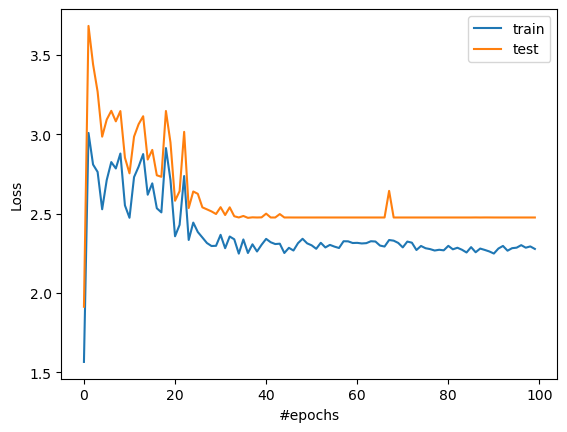

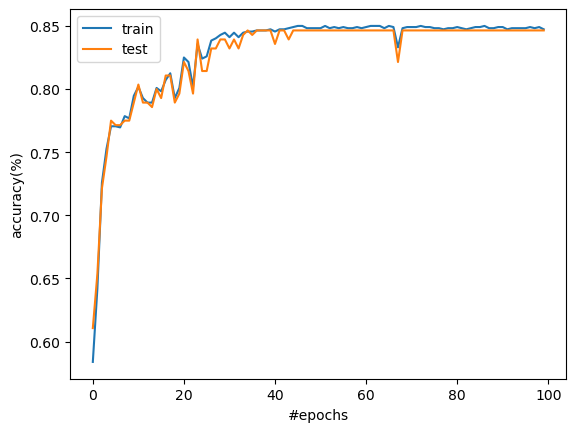

In [29]:
#-----------------------------------------drawing graph of loss
plt.figure(1)
plt.plot(train_loss, label='train')
plt.plot(test_loss, label='test')
plt.xlabel('#epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(2)
plt.plot(train_acc, label='train')
plt.plot(test_acc, label='test')
plt.xlabel('#epochs')
plt.ylabel('accuracy(%)')
plt.legend()
plt.show()